In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.optim as optim

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("weight_horsepower_mpg.csv")
df

,weight,horsepower,mpg
0,3504.0,130.0,18.0
1,3693.0,165.0,15.0
2,3436.0,150.0,18.0
3,3433.0,150.0,16.0
4,3449.0,140.0,17.0
...,...,...,...
387,2790.0,86.0,27.0
388,2130.0,52.0,44.0
389,2295.0,84.0,32.0
390,2625.0,79.0,28.0


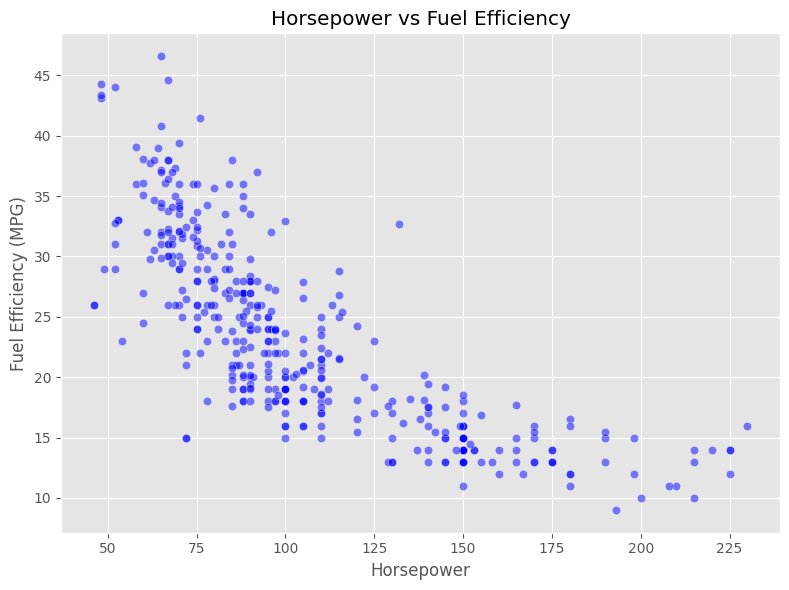

In [4]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x="horsepower",
    y="mpg",
    data=df,
    alpha=0.5,
    color="blue"
)

plt.xlabel("Horsepower")
plt.ylabel("Fuel Efficiency (MPG)")

plt.title("Horsepower vs Fuel Efficiency")

plt.grid(True)

plt.tight_layout()

plt.show()

In [5]:
X = df[["weight", "horsepower"]]
X

,weight,horsepower
0,3504.0,130.0
1,3693.0,165.0
2,3436.0,150.0
3,3433.0,150.0
4,3449.0,140.0
...,...,...
387,2790.0,86.0
388,2130.0,52.0
389,2295.0,84.0
390,2625.0,79.0


In [6]:
X_std = X.std()
X_std

weight        849.40256
horsepower     38.49116
dtype: float64

In [7]:
X_mean = X.mean()
X_mean

weight        2977.584184
horsepower     104.469388
dtype: float64

In [8]:
X = (X - X_mean) / X_std
X

,weight,horsepower
0,0.619748,0.663285
1,0.842258,1.572585
2,0.539692,1.182885
3,0.536160,1.182885
4,0.554997,0.923085
...,...,...
387,-0.220842,-0.479835
388,-0.997859,-1.363154
389,-0.803605,-0.531795
390,-0.415097,-0.661694


In [9]:
X.values

array([[ 6.19748328e-01,  6.63285084e-01],
       [ 8.42257664e-01,  1.57258478e+00],
       [ 5.39692059e-01,  1.18288491e+00],
       [ 5.36160165e-01,  1.18288491e+00],
       [ 5.54996934e-01,  9.23084997e-01],
       [ 1.60514682e+00,  2.42992449e+00],
       [ 1.62045169e+00,  3.00148430e+00],
       [ 1.57100517e+00,  2.87158434e+00],
       [ 1.70403986e+00,  3.13138426e+00],
       [ 1.02709346e+00,  2.22208456e+00],
       [ 6.89208914e-01,  1.70248474e+00],
       [ 7.43364626e-01,  1.44268482e+00],
       [ 9.22313934e-01,  1.18288491e+00],
       [ 1.27637732e-01,  3.13138426e+00],
       [-7.12953095e-01, -2.46014611e-01],
       [-1.70218681e-01, -2.46014611e-01],
       [-2.39679268e-01, -1.94054629e-01],
       [-4.59834008e-01, -5.05814524e-01],
       [-9.97859229e-01, -4.27874551e-01],
       [-1.34516216e+00, -1.51903418e+00],
       [-3.59763672e-01, -4.53854542e-01],
       [-6.44669806e-01, -3.75914568e-01],
       [-7.09421200e-01, -2.46014611e-01],
       [-8.

In [10]:
X = torch.tensor(X.values, dtype=torch.float32)
X

tensor([[ 6.1975e-01,  6.6329e-01],
        [ 8.4226e-01,  1.5726e+00],
        [ 5.3969e-01,  1.1829e+00],
        [ 5.3616e-01,  1.1829e+00],
        [ 5.5500e-01,  9.2308e-01],
        [ 1.6051e+00,  2.4299e+00],
        [ 1.6205e+00,  3.0015e+00],
        [ 1.5710e+00,  2.8716e+00],
        [ 1.7040e+00,  3.1314e+00],
        [ 1.0271e+00,  2.2221e+00],
        [ 6.8921e-01,  1.7025e+00],
        [ 7.4336e-01,  1.4427e+00],
        [ 9.2231e-01,  1.1829e+00],
        [ 1.2764e-01,  3.1314e+00],
        [-7.1295e-01, -2.4601e-01],
        [-1.7022e-01, -2.4601e-01],
        [-2.3968e-01, -1.9405e-01],
        [-4.5983e-01, -5.0581e-01],
        [-9.9786e-01, -4.2787e-01],
        [-1.3452e+00, -1.5190e+00],
        [-3.5976e-01, -4.5385e-01],
        [-6.4467e-01, -3.7591e-01],
        [-7.0942e-01, -2.4601e-01],
        [-8.7542e-01,  2.2163e-01],
        [-3.8802e-01, -3.7591e-01],
        [ 1.9277e+00,  2.8716e+00],
        [ 1.6464e+00,  2.4819e+00],
        [ 1.6534e+00,  2.741

In [11]:
y = df[["mpg"]]
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [12]:
y.values

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [11

In [13]:
y = torch.tensor(y.values, dtype=torch.float32)
y

tensor([[18.0000],
        [15.0000],
        [18.0000],
        [16.0000],
        [17.0000],
        [15.0000],
        [14.0000],
        [14.0000],
        [14.0000],
        [15.0000],
        [15.0000],
        [14.0000],
        [15.0000],
        [14.0000],
        [24.0000],
        [22.0000],
        [18.0000],
        [21.0000],
        [27.0000],
        [26.0000],
        [25.0000],
        [24.0000],
        [25.0000],
        [26.0000],
        [21.0000],
        [10.0000],
        [10.0000],
        [11.0000],
        [ 9.0000],
        [27.0000],
        [28.0000],
        [25.0000],
        [19.0000],
        [16.0000],
        [17.0000],
        [19.0000],
        [18.0000],
        [14.0000],
        [14.0000],
        [14.0000],
        [14.0000],
        [12.0000],
        [13.0000],
        [13.0000],
        [18.0000],
        [22.0000],
        [19.0000],
        [18.0000],
        [23.0000],
        [28.0000],
        [30.0000],
        [30.0000],
        [31.

In [14]:
epochs = 1000

In [15]:
model = torch.nn.Linear(2, 1)
model

Linear(in_features=2, out_features=1, bias=True)

In [16]:
criterion = torch.nn.MSELoss()
criterion

MSELoss()

In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
for epoch in range(epochs):
    predictions = model(X)

    loss = criterion(predictions, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    print(f"Epoch [{epoch}] cost: {loss.item():.4f}")

Epoch [0] cost: 622.8800
Epoch [1] cost: 597.4485
Epoch [2] cost: 573.1333
Epoch [3] cost: 549.8822
Epoch [4] cost: 527.6458
Epoch [5] cost: 506.3768
Epoch [6] cost: 486.0309
Epoch [7] cost: 466.5653
Epoch [8] cost: 447.9398
Epoch [9] cost: 430.1161
Epoch [10] cost: 413.0578
Epoch [11] cost: 396.7301
Epoch [12] cost: 381.1001
Epoch [13] cost: 366.1364
Epoch [14] cost: 351.8092
Epoch [15] cost: 338.0901
Epoch [16] cost: 324.9519
Epoch [17] cost: 312.3690
Epoch [18] cost: 300.3167
Epoch [19] cost: 288.7718
Epoch [20] cost: 277.7118
Epoch [21] cost: 267.1156
Epoch [22] cost: 256.9629
Epoch [23] cost: 247.2344
Epoch [24] cost: 237.9116
Epoch [25] cost: 228.9770
Epoch [26] cost: 220.4139
Epoch [27] cost: 212.2061
Epoch [28] cost: 204.3385
Epoch [29] cost: 196.7965
Epoch [30] cost: 189.5661
Epoch [31] cost: 182.6340
Epoch [32] cost: 175.9876
Epoch [33] cost: 169.6146
Epoch [34] cost: 163.5037
Epoch [35] cost: 157.6435
Epoch [36] cost: 152.0236
Epoch [37] cost: 146.6338
Epoch [38] cost: 141.4

In [20]:
[a1, a2] = model.weight.detach().numpy()[0]

b = model.bias.item()

print(f"\n최종 모델 공식 MPG = {a1:.4f} * 무게 + {a2:.4f} * 마력 + {b:.4f}")


최종 모델 공식 MPG = -4.8089 * 무게 + -1.9334 * 마력 + 23.4459


In [21]:
new_input = pd.DataFrame([[100, 200]], columns=["weight", "horsepower"])
new_input

,weight,horsepower
0,100,200


In [22]:
new_input = (new_input - X_mean) / X_std
new_input

,weight,horsepower
0,-3.387774,2.481884


In [23]:
new_input.values

array([[-3.38777432,  2.48188447]])

In [24]:
new_input = torch.tensor(new_input.values, dtype=torch.float32)

In [25]:
new_input

tensor([[-3.3878,  2.4819]])

In [26]:
predicted_mpg = model(new_input).item()

print(f"\n예측 연비(MPG): {predicted_mpg:.4f}")


예측 연비(MPG): 34.9387
